In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from scipy.special import erfc
from math import sqrt
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
NHD_MWC = gpd.read_file('./shapefiles/MWC_NHD_flowlines_utm.shp')

In [3]:
Wel_MWC = gpd.read_file('./shapefiles/MWC_water_wells_utm.shp')

<AxesSubplot:>

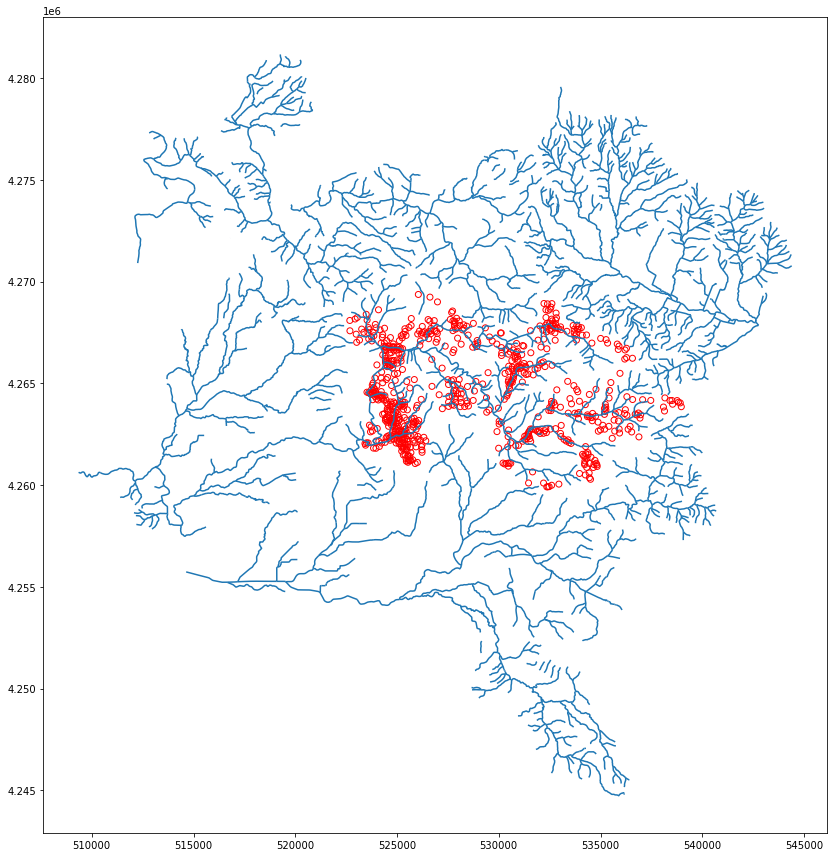

In [4]:
fig, ax = plt.subplots(figsize=(15, 15))
NHD_MWC.plot(ax=ax)
Wel_MWC.plot(ax=ax, facecolor='none', edgecolor='red')

In [5]:
print(Wel_MWC.head())

   Id           X            Y                        geometry
0   1  523453.828  4261964.736  POINT (523453.828 4261964.736)
1   2  523580.345  4262075.987  POINT (523580.345 4262075.987)
2   3  523424.939  4262043.220  POINT (523424.939 4262043.220)
3   4  523845.646  4261819.372  POINT (523845.646 4261819.372)
4   5  523964.708  4261811.435  POINT (523964.708 4261811.435)


In [6]:
# return minimum distance between each water-well and its nearest stream
dist = Wel_MWC.geometry.apply(lambda x: NHD_MWC.distance(x).min())
print(dist)

0       85.750185
1        2.321997
2       95.367457
3      168.156559
4      207.555515
          ...    
713      8.694161
714     40.130655
715      3.494361
716     47.553326
717     35.718016
Name: geometry, Length: 718, dtype: float64


In [7]:
# constants
S = 0.15      # param S aquifer storage coefficient []
Tr = 100      # param Tr aquifer transmissivity [L2/T]
t = 365       # param t times you want output for [T]

In [8]:
df = pd.DataFrame(data=dist)
print(df)

       geometry
0     85.750185
1      2.321997
2     95.367457
3    168.156559
4    207.555515
..          ...
713    8.694161
714   40.130655
715    3.494361
716   47.553326
717   35.718016

[718 rows x 1 columns]


In [9]:
# Glover & Balmer (1954)
n = Wel_MWC.Id.count()
L = dist.to_numpy(dtype=float)
for j in range(0,n):
    sfd = erfc(np.sqrt((S * L[j]**2)/(4* Tr * np.arange(1, t+1))))
sfd1 = (sfd)

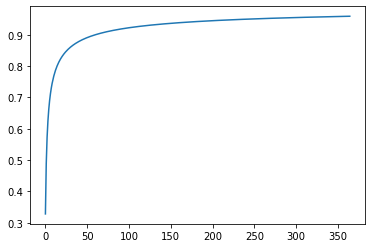

In [10]:
# SFD = streamflow depletion factor
plt.plot(sfd1)

In [11]:
df2 = pd.read_csv('./shapefiles//monthly_avg_pumpings.csv')
df2

,Month,pumpings
0,1,11.928251
1,2,12.242152
2,3,13.968610
3,4,20.560538
4,5,31.076233
5,6,57.914798
6,7,56.502242
7,8,54.618834
8,9,40.179372
9,10,28.251121


In [14]:
# pumping rates of  wells ({Qw}; [acf/d])
Qw = df2['pumpings'].mean()/30
Qw

0.9796337818055556

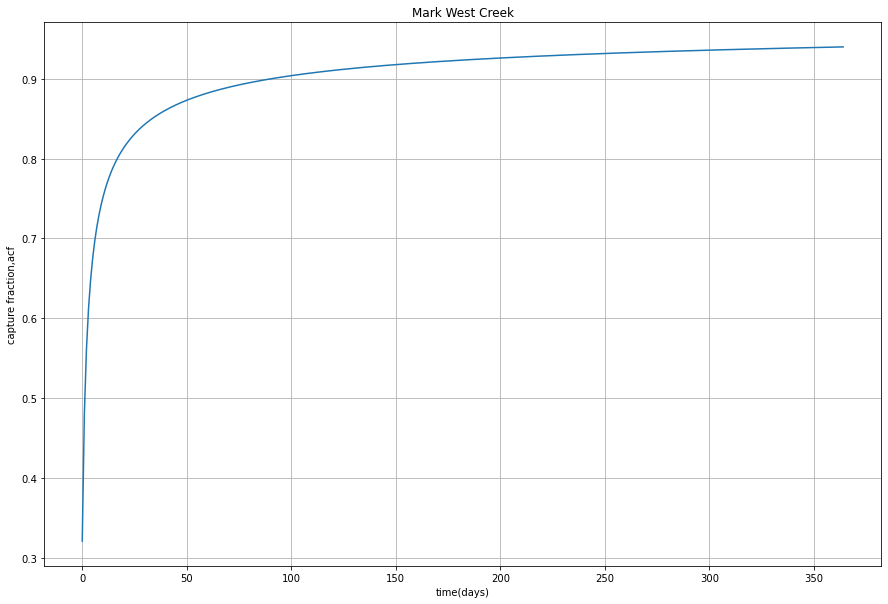

In [15]:
# Plot capture fraction through time
capture = Qw * sfd1
fig = plt.figure(figsize=(15, 10))
plt.plot(capture)
plt.title('Mark West Creek')
plt.xlabel('time(days)')
plt.ylabel('capture fraction,acf')
plt.grid(True)

In [19]:
# Sum total of captures (acf)
np.sum(capture)

329.73275588317915

In [ ]:
np.savetxt("Mark_West_via_Glover.csv", capture, delimiter="/")